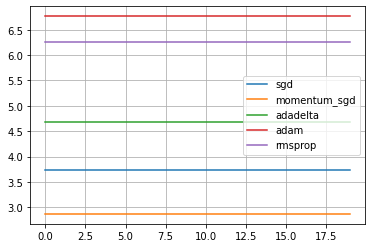

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim import optimizer

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(in_features=10, out_features=10, bias=False)

    def forward(self, x):
        x = self.lin1(x)
        return x

def main(opt_conf):
    loss_list = []

    x = torch.randn(1, 10)
    w = torch.randn(1, 1)
    y = torch.mul(w, x) + 2

    net = Net()

    criterion = nn.MSELoss()

    if opt_conf == "sgd":
        optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    elif opt_conf == "momentum_sgd":
        optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
    elif opt_conf == "adadelta":
        optimizer = torch.optim.Adadelta(net.parameters(), rho=0.95, eps=1e-04)
    elif opt_conf == "adagrad":
        optimizer = torch.optim.Adagrad(net.parameters())
    elif opt_conf == "adam":
        optimizer = torch.optim.Adam(net.parameters(), lr=1e-1, betas=(0.9, 0.99), eps=1e-09)
    elif opt_conf == "rmsprop":
        optimizer = torch.optim.RMSprop(net.parameters())
    
    for epoch in range(20):
        optimizer.zero_grad()
        y_pred = net(x)

        loss = criterion(y_pred, y)
        loss.backward()

        loss_list.append(loss.data.item())
    
    return loss_list

losss_dict = {}
losss_dict["sgd"] = []
losss_dict["momentum_sgd"] = []
losss_dict["adadelta"] = []
losss_dict["adam"] = []
losss_dict["rmsprop"] = []

for key, value in losss_dict.items():
    losss_dict[key] = main(key)

plt.figure()
plt.plot(losss_dict["sgd"], label='sgd')
plt.plot(losss_dict["momentum_sgd"], label='momentum_sgd')
plt.plot(losss_dict["adadelta"], label='adadelta')
plt.plot(losss_dict["adam"], label='adam')
plt.plot(losss_dict["rmsprop"], label='rmsprop')
plt.legend()
plt.grid()
plt.show()